## Import Packages

In [ ]:
import os
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random
import torchvision.models as models


## Load Data; Split into Test, Training and Validation

In [ ]:
## Mount Google Drive Data 
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    print("Mounting Failed.")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
## load data and the file name
data_path = './gdrive/Shareddrives/682 final project/video-classification-master/dataset'
fnames = os.listdir(data_path)
print(fnames)
## get labels from the file name
labels = []
for i in fnames:
  labels.append(i.split('_')[1])
labels = pd.get_dummies(np.unique(labels))
#check that we have 50 labels
len(labels)

['v_CricketShot_g21_c01', 'v_CricketBowling_g21_c01', 'v_BreastStroke_g17_c01', 'v_JavelinThrow_g10_c01', 'v_HighJump_g21_c01', 'v_BreastStroke_g03_c01', 'v_FrontCrawl_g23_c01', 'v_CleanAndJerk_g24_c01', 'v_JavelinThrow_g04_c01', 'v_FloorGymnastics_g08_c01', 'v_Kayaking_g08_c01', 'v_Kayaking_g20_c01', 'v_CleanAndJerk_g18_c01', 'v_CricketShot_g09_c01', 'v_FloorGymnastics_g20_c01', 'v_BasketballDunk_g13_c01', 'v_PommelHorse_g03_c01', 'v_Archery_g09_c01', 'v_PommelHorse_g17_c01', 'v_Archery_g21_c01', 'v_BasketballDunk_g06_c01', 'v_Rowing_g05_c01', 'v_GolfSwing_g22_c01', 'v_Archery_g20_c01', 'v_BasketballDunk_g07_c01', 'v_Rowing_g10_c01', 'v_Rowing_g04_c01', 'v_BasketballDunk_g12_c01', 'v_Rowing_g11_c01', 'v_GolfSwing_g23_c01', 'v_PommelHorse_g16_c01', 'v_CricketShot_g08_c01', 'v_PommelHorse_g02_c01', 'v_Kayaking_g09_c01', 'v_BreastStroke_g02_c01', 'v_CleanAndJerk_g19_c01', 'v_Archery_g08_c01', 'v_FloorGymnastics_g21_c01', 'v_Kayaking_g21_c01', 'v_JavelinThrow_g05_c01', 'v_HighJump_g08_c01

50

In [ ]:
# split into training and test (split by video)
random.shuffle(fnames)
test = fnames[0:int(len(fnames)*0.2)]
valid = fnames[int(len(fnames)*0.2):int(len(fnames)*0.4)]
train = fnames[int(len(fnames)*0.4):len(fnames)]
print('we total have ',len(fnames), 'samples')
print('length of test data is', len(test))
print('length of validation data is', len(valid))
print('length of train data is', len(train))
print(train)

we total have  1250 samples
length of test data is 250
length of validation data is 250
length of train data is 750
['v_BalanceBeam_g23_c01', 'v_ThrowDiscus_g04_c01', 'v_PommelHorse_g16_c01', 'v_BalanceBeam_g25_c01', 'v_CricketBowling_g15_c01', 'v_SkyDiving_g23_c01', 'v_Kayaking_g01_c01', 'v_HammerThrow_g02_c01', 'v_Bowling_g04_c01', 'v_UnevenBars_g17_c01', 'v_CliffDiving_g18_c01', 'v_Diving_g23_c01', 'v_FrontCrawl_g01_c01', 'v_HorseRace_g16_c01', 'v_BalanceBeam_g05_c01', 'v_BreastStroke_g16_c01', 'v_Punch_g25_c01', 'v_CliffDiving_g17_c01', 'v_CliffDiving_g07_c01', 'v_Surfing_g13_c01', 'v_CliffDiving_g12_c01', 'v_Biking_g24_c01', 'v_CricketShot_g01_c01', 'v_ParallelBars_g15_c01', 'v_BaseballPitch_g10_c01', 'v_ParallelBars_g14_c01', 'v_Fencing_g16_c01', 'v_Rowing_g09_c01', 'v_BoxingSpeedBag_g06_c01', 'v_ThrowDiscus_g05_c01', 'v_Surfing_g14_c01', 'v_TennisSwing_g18_c01', 'v_Biking_g12_c01', 'v_Skiing_g15_c01', 'v_Fencing_g09_c01', 'v_Shotput_g03_c01', 'v_FieldHockeyPenalty_g02_c01', 'v_D

In [ ]:
# load train data
y_train = []
X_train = []
count=0
for i in train:
  count+=1
  label = i.split('_')[1]
  ffnames = os.listdir(data_path+'/'+i)
  for j in ffnames:
    #Loads an image into PIL(Python Imaging Library) format.
    img = np.array(image.load_img(data_path+'/'+i+'/'+j))
    
    y_train.append(label)
    X_train.append(img)
    #print(img.shape)
 
X_train = np.array(X_train)
y_train = np.array(y_train)


#X_train.shape, y_train.shape

In [ ]:
# load valid data

y_val = []
X_val = []
count=0


for i in valid:
  count+=1
  label = i.split('_')[1]
  ffnames = os.listdir(data_path+'/'+i)
  for j in ffnames:
    #Loads an image into PIL(Python Imaging Library) format.
    img = np.array(image.load_img(data_path+'/'+i+'/'+j))
    
    y_val.append(label)
    X_val.append(img)
    
X_val = np.array(X_val)
y_val = np.array(y_val)


#X_val.shape, y_val.shape

In [ ]:
# print shape
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12165, 256, 256, 3), (3954, 256, 256, 3), (12165, 50), (3954, 50))

## Model Building

In [ ]:
# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

#extract features from this pre-trained model for our training and validation images:
X_train = base_model.predict(X_train)
X_val = base_model.predict(X_val)
X_train.shape, X_val.shape

((12165, 3, 4, 512), (3954, 3, 4, 512))

In [ ]:
# reshape the images into a single dimension
#print(X_val.shape[0])
dim2 = X_val.shape[1]*X_val.shape[2]*X_val.shape[3]
X_train = X_train.reshape(X_train.shape[0], dim2)
X_val = X_val.reshape(X_val.shape[0], dim2)
X_train.shape, X_val.shape

((12165, 6144), (3954, 6144))

In [ ]:
# normalize the pixel value
max = X_train.max()
X_train = X_train/max
X_val = X_val/max

In [ ]:
# input size
X_train.shape

(12165, 6144)

In [ ]:
# create the architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim2,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

## Model Training

In [ ]:
#  save the weights of the model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('./gdrive/Shareddrives/682 final project/weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# optimum model based on the validation loss
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# training
model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[mcp_save], batch_size=128)

Epoch 1/200
96/96 [==============================] - 1s 7ms/step - loss: 3.7576 - accuracy: 0.0637 - val_loss: 3.0454 - val_accuracy: 0.2296
Epoch 2/200
96/96 [==============================] - 1s 5ms/step - loss: 2.5472 - accuracy: 0.3252 - val_loss: 2.3019 - val_accuracy: 0.3907
Epoch 3/200
96/96 [==============================] - 1s 5ms/step - loss: 1.4488 - accuracy: 0.5822 - val_loss: 2.0878 - val_accuracy: 0.4547
Epoch 4/200
96/96 [==============================] - 0s 5ms/step - loss: 0.8803 - accuracy: 0.7433 - val_loss: 2.3008 - val_accuracy: 0.4633
Epoch 5/200
96/96 [==============================] - 0s 5ms/step - loss: 0.5942 - accuracy: 0.8189 - val_loss: 2.2468 - val_accuracy: 0.4868
Epoch 6/200
96/96 [==============================] - 0s 5ms/step - loss: 0.4005 - accuracy: 0.8780 - val_loss: 2.5079 - val_accuracy: 0.4823
Epoch 7/200
96/96 [==============================] - 1s 5ms/step - loss: 0.2728 - accuracy: 0.9149 - val_loss: 2.5221 - val_accuracy: 0.4934
Epoch 8/200
9

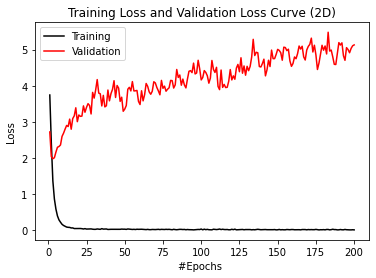

In [ ]:
# plot loss value
f  = open("./gdrive/Shareddrives/682 final project/Epoch 2.txt", "r") 
contents =f.read()

count=0
train_loss=[]
valid_loss=[]
for i in range(len(contents)):
  if contents[i:i+4]=='loss':

    tmp_num = float(contents[i+6:i+12])
    if count % 2==0:
      train_loss.append(tmp_num)
    else:
      valid_loss.append(tmp_num)
    count+=1


x_axis = np.linspace(1,200,200)
#plt.scatter(x_axis,train_loss)
plt.xlabel('#Epochs ')
plt.ylabel('Loss ')
plt.plot(x_axis,train_loss,color='k',label='Training')
plt.plot(x_axis,valid_loss,color='r',label='Validation')
plt.title('Training Loss and Validation Loss Curve (2D)')
plt.legend()
plt.show()

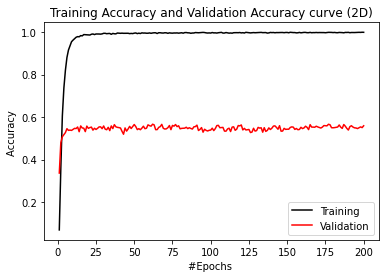

In [ ]:
# plot accuracy value
f  = open("./gdrive/Shareddrives/682 final project/Epoch 2.txt", "r") 
contents =f.read()

count=0
train_acc=[]
valid_acc=[]
for i in range(len(contents)):
  if contents[i:i+8]=='accuracy':

    tmp_num = float(contents[i+10:i+16])
    if count % 2==0:
      train_acc.append(tmp_num)
    else:
      valid_acc.append(tmp_num)
    count+=1


x_axis = np.linspace(1,200,200)
#plt.scatter(x_axis,train_loss)
plt.xlabel('#Epochs ')
plt.ylabel('Accuracy ')
plt.plot(x_axis,train_acc,color='k', label='Training')
plt.plot(x_axis,valid_acc,color='r', label='Validation')
plt.title('Training Accuracy and Validation Accuracy curve (2D)')
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
# build pre-trained and new model
base_model = VGG16(weights='imagenet', include_top=False)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim2,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# load weight to new model
model.load_weights('./gdrive/Shareddrives/682 final project/weight.hdf5')

# compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# prediction
from scipy import stats as s

# creating two lists to store predicted and actual tags
predict = []
y_test = []


# for every video
for i in test:
  # actual
  y_test.append(i.split('_')[1])

  ffnames = os.listdir(data_path+'/'+i)
  X_test = []
  for j in ffnames:
    img = np.array(image.load_img(data_path+'/'+i+'/'+j))
    X_test.append(img)

  # converting all the frames for a test video into numpy array
  X_test = np.array(X_test)
  # extracting features using pre-trained model
  X_test = base_model.predict(X_test)
  # converting features in one dimensional array
  X_test = X_test.reshape(X_test.shape[0], dim2)
  # predicting tags for each array
  prediction = model.predict_classes(X_test)
  # appending the mode of predictions in predict list to assign the tag to the video
  predict.append(labels.columns.values[s.mode(prediction)[0][0]])





/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(predict, y_test)*100

54.4
